In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import datetime
import pandas as pd

from palettable.colorbrewer.diverging import *
from palettable.colorbrewer.sequential import *
from calendar import monthrange

# Topo map

In [2]:
path = "/scratch/summit/erke2265/PRODUCTION/2015_WN/output/grids/a3d_grids_2015.nc"
ds = xr.open_dataset(path)

In [3]:
dem = np.flipud(np.loadtxt("/scratch/summit/erke2265/SNOWPACK_WAIS/input/surface-grids/dem.asc", skiprows=6))
dem = xr.DataArray(dem, coords=[ds['northing'], ds['easting']], dims=['northing', 'easting'])

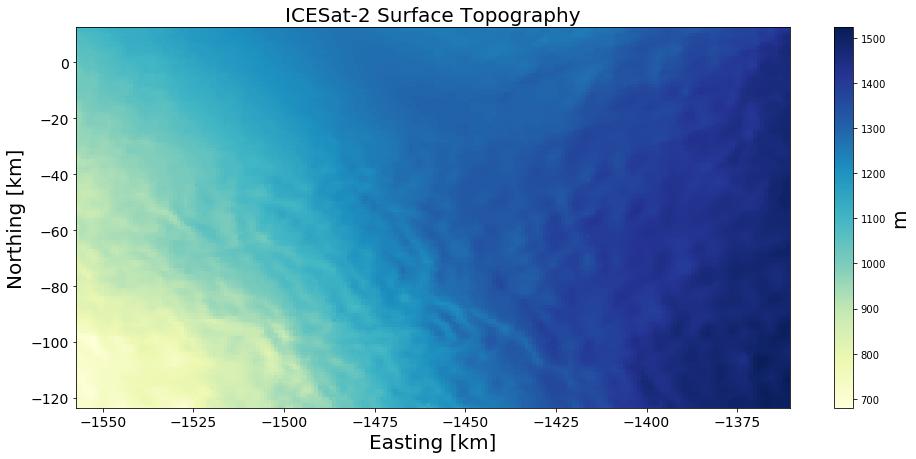

In [13]:
colormap=YlGnBu_9.mpl_colormap

plt.figure(figsize=(16, 7))
plt.pcolor(ds['easting']/1000, ds['northing']/1000, dem, cmap=colormap, linewidth=0, rasterized=True)
cb = plt.colorbar()
cb.set_label("m", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Easting [km]", fontsize=20)
plt.ylabel("Northing [km]", fontsize=20)
plt.title("ICESat-2 Surface Topography", fontsize=20)
plt.savefig("images/surface_topo.pdf", format='pdf', dpi=100, bbox_inches='tight')